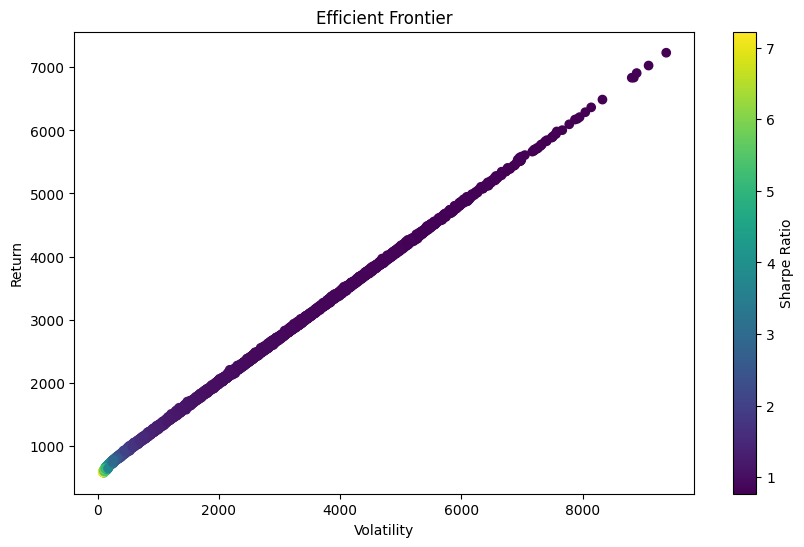

Optimal Weights:
AAPL: 0.1080
MSFT: 0.2823
AMZN: 0.2015
GOOG: 0.2644
FB: 0.0007
TSLA: 0.0517
JPM: 0.0914


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulating adjusted close prices for 7 assets over 502 trading days (approximately 2 years of data)
np.random.seed(42)  # For reproducibility
dates = pd.date_range(start='2022-01-01', periods=502, freq='B')
data = pd.DataFrame(np.random.rand(502, 7) * 100,
                    index=dates,
                    columns=['AAPL', 'MSFT', 'AMZN', 'GOOG', 'FB', 'TSLA', 'JPM'])

# Calculate daily returns
daily_returns = data.pct_change()

# Assume the correlation matrix and save to CSV
correlation_matrix = daily_returns.corr()
correlation_matrix.to_csv('correlation_matrix.csv')

class PortfolioOptimization:
    def __init__(self, returns):
        self.returns = returns
        self.n_assets = returns.shape[1]
        self.portfolio_weights = []

    def simulate_portfolios(self, n_simulations=10000):
        np.random.seed(42)
        portfolio_returns = []
        portfolio_volatility = []
        portfolio_weights = []

        for _ in range(n_simulations):
            weights = np.random.random(self.n_assets)
            weights /= np.sum(weights)
            annual_return = np.sum(weights * self.returns.mean()) * 252
            volatility = np.sqrt(np.dot(weights.T, np.dot(self.returns.cov() * 252, weights)))
            portfolio_returns.append(annual_return)
            portfolio_volatility.append(volatility)
            portfolio_weights.append(weights)

        self.portfolio_returns = np.array(portfolio_returns)
        self.portfolio_volatility = np.array(portfolio_volatility)
        self.portfolio_weights = portfolio_weights

    def plot_efficient_frontier(self):
        clean_returns = np.nan_to_num(self.portfolio_returns, nan=0.0, posinf=0.0, neginf=0.0)
        clean_volatility = np.nan_to_num(self.portfolio_volatility, nan=0.0, posinf=0.0, neginf=0.0)

        sharpe_ratios = clean_returns / clean_volatility
        sharpe_ratios = np.nan_to_num(sharpe_ratios, nan=0.5)

        plt.figure(figsize=(10, 6))
        plt.scatter(clean_volatility, clean_returns, c=sharpe_ratios, marker='o', cmap='viridis')
        plt.xlabel('Volatility')
        plt.ylabel('Return')
        plt.colorbar(label='Sharpe Ratio')
        plt.title('Efficient Frontier')
        plt.savefig('efficient_frontier.png')
        plt.show()

# Perform portfolio optimization
portfolio_optimization = PortfolioOptimization(daily_returns)
portfolio_optimization.simulate_portfolios()
portfolio_optimization.plot_efficient_frontier()

# Identify the portfolio with the highest Sharpe ratio
sharpe_ratios = portfolio_optimization.portfolio_returns / portfolio_optimization.portfolio_volatility
index_max_sharpe = np.argmax(sharpe_ratios)
optimal_weights = portfolio_optimization.portfolio_weights[index_max_sharpe]

# Output the optimal weights
print("Optimal Weights:")
for asset, weight in zip(['AAPL', 'MSFT', 'AMZN', 'GOOG', 'FB', 'TSLA', 'JPM'], optimal_weights):
    print(f"{asset}: {weight:.4f}")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulating adjusted close prices for 7 assets over 502 trading days (approximately 2 years of data)
np.random.seed(42)  # For reproducibility
dates = pd.date_range(start='2022-01-01', periods=502, freq='B')
data = pd.DataFrame(np.random.rand(502, 7) * 100,
                    index=dates,
                    columns=['AAPL', 'MSFT', 'AMZN', 'GOOG', 'FB', 'TSLA', 'JPM'])

# Calculate daily returns
daily_returns = data.pct_change()

# Assume the correlation matrix and save to CSV
correlation_matrix = daily_returns.corr()
correlation_matrix.to_csv('correlation_matrix.csv')

class PortfolioOptimization:
    def __init__(self, returns):
        self.returns = returns
        self.n_assets = returns.shape[1]
        self.portfolio_weights = []

    def simulate_portfolios(self, n_simulations=10000):
        np.random.seed(42)
        portfolio_returns = []
        portfolio_volatility = []
        portfolio_weights = []

        for _ in range(n_simulations):
            weights = np.random.random(self.n_assets)
            weights /= np.sum(weights)
            annual_return = np.sum(weights * self.returns.mean()) * 252
            volatility = np.sqrt(np.dot(weights.T, np.dot(self.returns.cov() * 252, weights)))
            portfolio_returns.append(annual_return)
            portfolio_volatility.append(volatility)
            portfolio_weights.append(weights)
        
        self.portfolio_returns = np.array(portfolio_returns)
        self.portfolio_volatility = np.array(portfolio_volatility)
        self.portfolio_weights = portfolio_weights

    def plot_efficient_frontier(self):
        clean_returns = np.nan_to_num(self.portfolio_returns, nan=0.0, posinf=0.0, neginf=0.0)
        clean_volatility = np.nan_to_num(self.portfolio_volatility, nan=0.0, posinf=0.0, neginf=0.0)
        
        sharpe_ratios = clean_returns / clean_volatility
        sharpe_ratios = np.nan_to_num(sharpe_ratios, nan=0.5)

        plt.figure(figsize=(10, 6))
        plt.scatter(clean_volatility, clean_returns, c=sharpe_ratios, marker='o', cmap='viridis')
        plt.xlabel('Volatility')
        plt.ylabel('Return')
        plt.colorbar(label='Sharpe Ratio')
        plt.title('Efficient Frontier')
        plt.savefig('efficient_frontier.png')
        plt.show()

# Perform portfolio optimization
portfolio_optimization = PortfolioOptimization(daily_returns)
portfolio_optimization.simulate_portfolios()
portfolio_optimization.plot_efficient_frontier()

# Identify the portfolio with the highest Sharpe ratio
sharpe_ratios = portfolio_optimization.portfolio_returns / portfolio_optimization.portfolio_volatility
index_max_sharpe = np.argmax(sharpe_ratios)
optimal_weights = portfolio_optimization.portfolio_weights[index_max_sharpe]

# Output the optimal weights
print("Optimal Weights:")
for asset, weight in zip(['AAPL', 'MSFT', 'AMZN', 'GOOG', 'FB', 'TSLA', 'JPM'], optimal_weights):
    print(f"{asset}: {weight:.4f}")